In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib as mpl

import raddetect as rd

In [2]:
from scipy.stats import crystalball
from scipy.stats import norm
from scipy.stats import skewnorm

In [3]:
# It works only in the MPIK network
blumchen = rd.BlumchenAnalysis(filename='Rn26062024')

Retrieving data from https://radon-srv1.mpi-hd.mpg.de/coating_db/resultfiles/Rn26062024/rn26062024.root


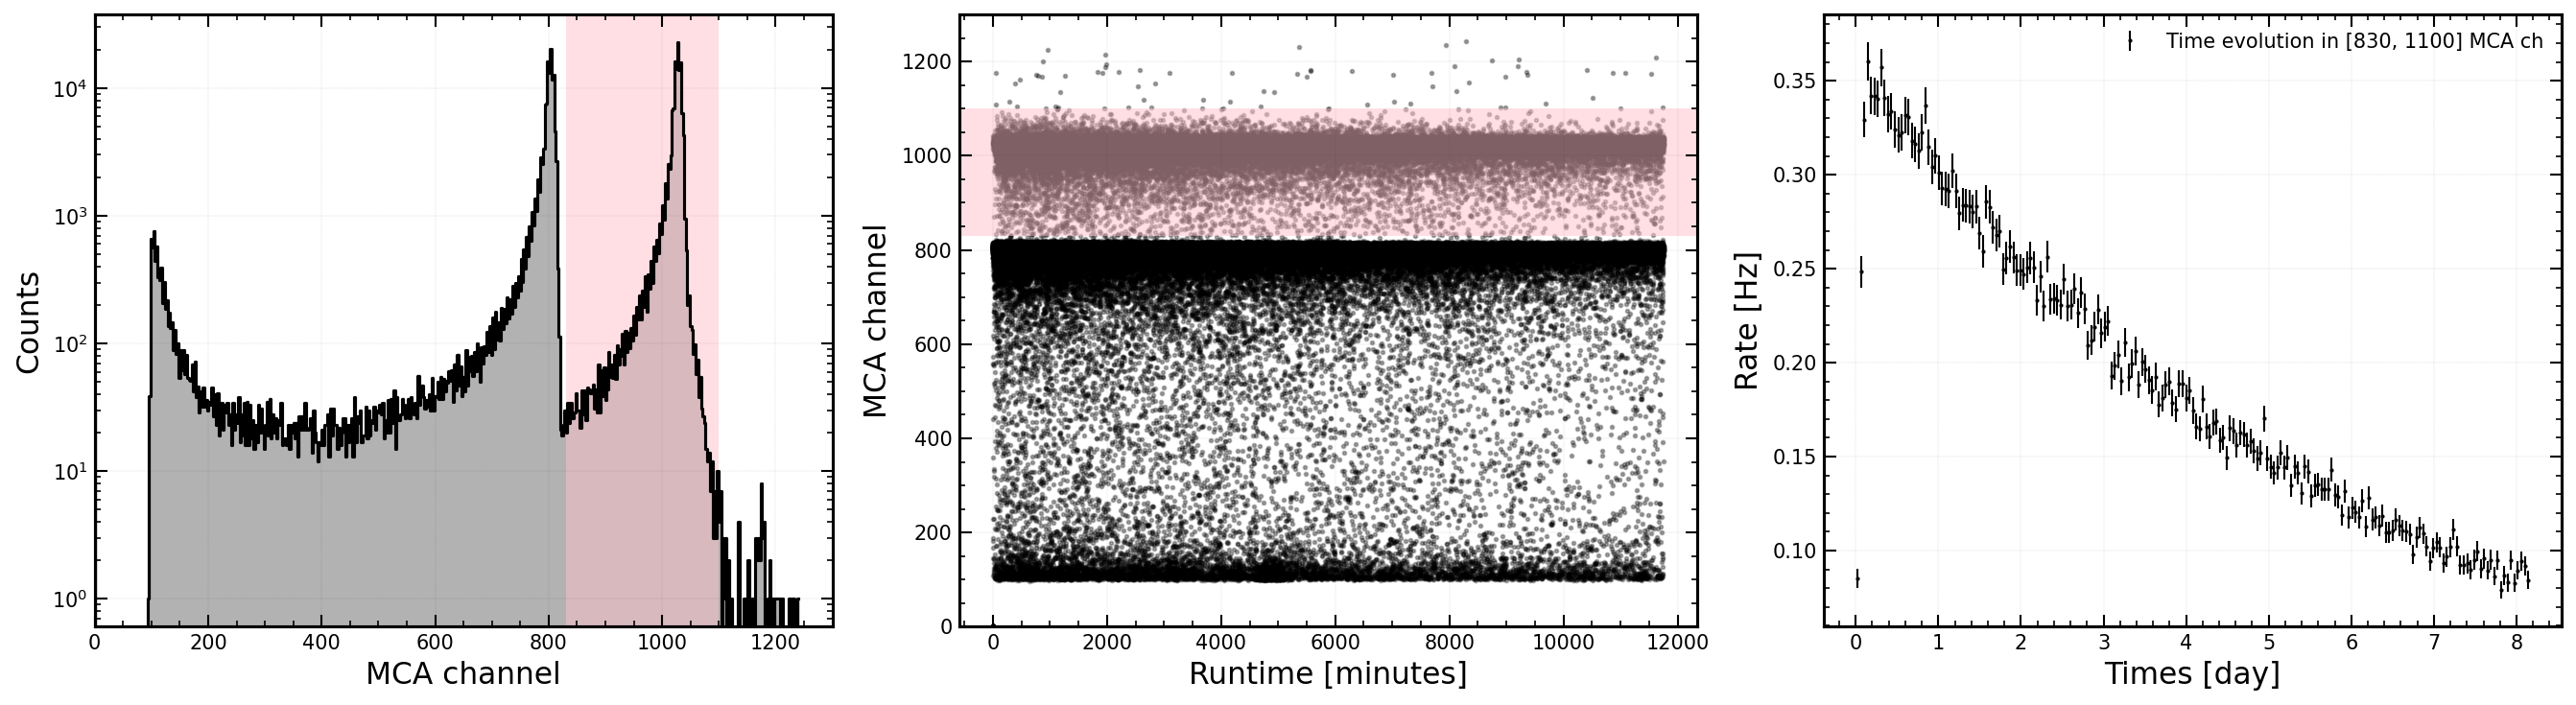

In [4]:
blumchen.get_base_plot(n_channels=500, n_timestamp=200, MCA_range=[830, 1100])

## Fir spectrum

In [5]:
class Model:
    def __init__(self, 
                x, 
                beta1, m1, loc1, scale1, A1, 
                beta2, m2, loc2, scale2, A2, 
                # a1s, loc1s, scale1s, A1s, 
                a1s, A1s, 
                # a2s, loc2s, scale2s, A2s
                a2s, A2s
                ):
        self.x = x
        self.beta1 = beta1
        self.m1 = m1
        self.loc1 = loc1
        self.scale1 = scale1
        self.A1 = A1
        self.beta2 = beta2
        self.m2 = m2
        self.loc2 = loc2
        self.scale2 = scale2
        self.A2 = A2
        self.a1s = a1s
        self.loc1s = loc1
        self.scale1s = scale1
        self.A1s = A1s
        self.a2s = a2s
        self.loc2s = loc2
        self.scale2s = scale2
        self.A2s = A2s
        self.compute_terms()

    def compute_terms(self):
        self.crystalball_1 = self.A1 * crystalball.pdf(self.x, self.beta1, self.m1, loc=self.loc1, scale=self.scale1)
        self.skewnorm_1 = self.A1s * skewnorm.pdf(self.x, self.a1s, loc=self.loc1s, scale=self.scale1s)
        self.crystalball_2 = self.A2 * crystalball.pdf(self.x, self.beta2, self.m2, loc=self.loc2, scale=self.scale2) 
        self.skewnorm_2 = self.A2s * skewnorm.pdf(self.x, self.a2s, loc=self.loc2s, scale=self.scale2s)

    def sum_terms(self):
        return self.crystalball_1 + self.skewnorm_1 + self.crystalball_2 + self.skewnorm_2

    @staticmethod
    def total_model(x, 
                    beta1, m1, loc1, scale1, A1, 
                    beta2, m2, loc2, scale2, A2, 
                    # a1s, loc1s, scale1s, A1s, 
                    a1s, A1s, 
                    # a2s, loc2s, scale2s, A2s
                    a2s, A2s):
        model_instance = Model(x, 
                            beta1, m1, loc1, scale1, A1, 
                            beta2, m2, loc2, scale2, A2, 
                            # a1s, loc1s, scale1s, A1s, 
                            a1s, A1s, 
                            # a2s, loc2s, scale2s, A2s
                            a2s, A2s)
        return model_instance.sum_terms()

In [6]:
init = {
    'beta1': 0.552, 'm1': 2.29, 'loc1': 807.11, 'scale1': 3.65, 'A1': 72.4e3,
    'beta2': 1.048, 'm2': 1.986, 'loc2': 1.029435e3, 'scale2': 4.897, 'A2': 98.3e3,
    # 'a1s': -2.95, 'loc1s': 805.04, 'scale1s': 5.46, 'A1s': 21.9e3,
    'a1s': -2.95, 'A1s': 21.9e3,
    # 'a2s': 1.568, 'loc2s': 1029.57+50, 'scale2s': 5.057, 'A2s': 101.2e3/2,
    'a2s': 100, 'A2s': 101.2e3/2,
}

fixed = {
    # 'beta1': True, 'm1': True, 'loc1': True, 'scale1': True, 'A1': True,
    # 'beta2': True, 'm2': True, 'loc2': True, 'scale2': True, 'A2': True,
    # 'a1s': True, 'loc1s': True, 'scale1s': True, 'A1s': True,
    # 'a1s': True, 'A1s': True,
    # 'a2s': True,
}

limits = {
    # 'a2s': [0, np.inf]    
}

_MCA_range = [600, 1150]
_MCA_counts_limit = 4
m = blumchen.get_mca_spectrum_fitting_object(model=Model, init=init, limits=limits, fixed=fixed, MCA_range=_MCA_range, MCA_counts_limit=_MCA_counts_limit)
m.migrad()
m.minos()
m.hesse()

Prefit with scipy for deriving inital values


/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


| Parameters | Value       | Error       |
------------------------------------------
| beta1      |       0.780 |         inf |
| m1         |       2.164 |         inf |
| loc1       |     804.359 |         inf |
| scale1     |       5.139 |         inf |
| A1         |   90158.701 |         inf |
| beta2      |       1.180 |         inf |
| m2         |       1.982 |         inf |
| loc2       |    1029.003 |         inf |
| scale2     |       5.571 |         inf |
| A2         |  128944.207 |         inf |
| a1s        |      -0.234 |         inf |
| A1s        |   29627.347 |         inf |
| a2s        |     768.790 |         inf |
| A2s        |     904.476 |         inf |
------------------------------------------


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2184 (χ²/ndof = 4.6)       │             Nfcn = 6972              │
│ EDM = 3.49 (Goal: 0.0002)        │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ beta1  │   0.780   │   0.026   │   -0.026   │   0.027    │         │         │       │
│ 1 │ m1     │   2.16    │   0.04    │   -0.04    │    0.04    │         │         │       │
│ 2 │ loc1   │  804.36   │   0.07    │   -0.07    │    0.07    │         │         │       │
│ 3 │ scale1 │   5.139   │   0.019   │   -0.019   │   0.019    │         │         │       │
│ 4 │ A1     │  90.1e3   │   2.6e3   │   -2.6e3   │   2.7e3    │         │         │       │
│ 5 │ beta2  │   1.180   │   0.009   │   -0.009   │   0.009    │         │         │       │
│ 6 │ m2     │   1.982   │   0.020   │   -0.020   │   0.020    │         │         │       │
│ 7 │ loc2   │ 1.02900e3 │ 0.00005e3 │ -0.00005e3 │ 0.00005e3  │         │         │       │
│ 8 │ scale2 │   5.571   │   0.023   │   -0.023   │   0.022    │         │         │       │
│ 9 │ A2     │  128.9e3  │   0.8e3   │   -0.7e3   │   0.8e3    │         │         │       │
│ 10│ a1s    │   -0.23   │   0.04    │   -0.04    │    0.04    │         │         │       │
│ 11│ A1s    │  29.6e3   │   2.5e3   │   -2.6e3   │   2.5e3    │         │         │       │
│ 12│ a2s    │  1.42e3   │  2.62e3   │  -0.35e3   │   0.35e3   │         │         │       │
│ 13│ A2s    │   0.9e3   │   0.6e3   │   -0.6e3   │   0.6e3    │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │         beta1         │          m1           │         loc1          │        scale1         │          A1           │         beta2         │          m2           │         loc2          │        scale2         │          A2           │          a1s          │          A1s          │          a2s          │          A2s          │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.026   │   0.027   │   -0.04   │   0.04    │   -0.07   │   0.07    │  -0.019   │   0.019   │  -2.6e3   │   2.7e3   │  -0.009   │   0.009   │   -0.02   │   0.02    │   -0.05   │   0.05    │  -0.023   │   0.022   │  -0.7e3   │   0.8e3   │   -0.04   │   0.04    │  -2.6e3   │   2.5e3   │  -0.35e3  │  0.35e3   │  -0.6e3   │   0.6e3   │
│  Valid   │   Tru

/tmp/ipykernel_19189/507033132.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


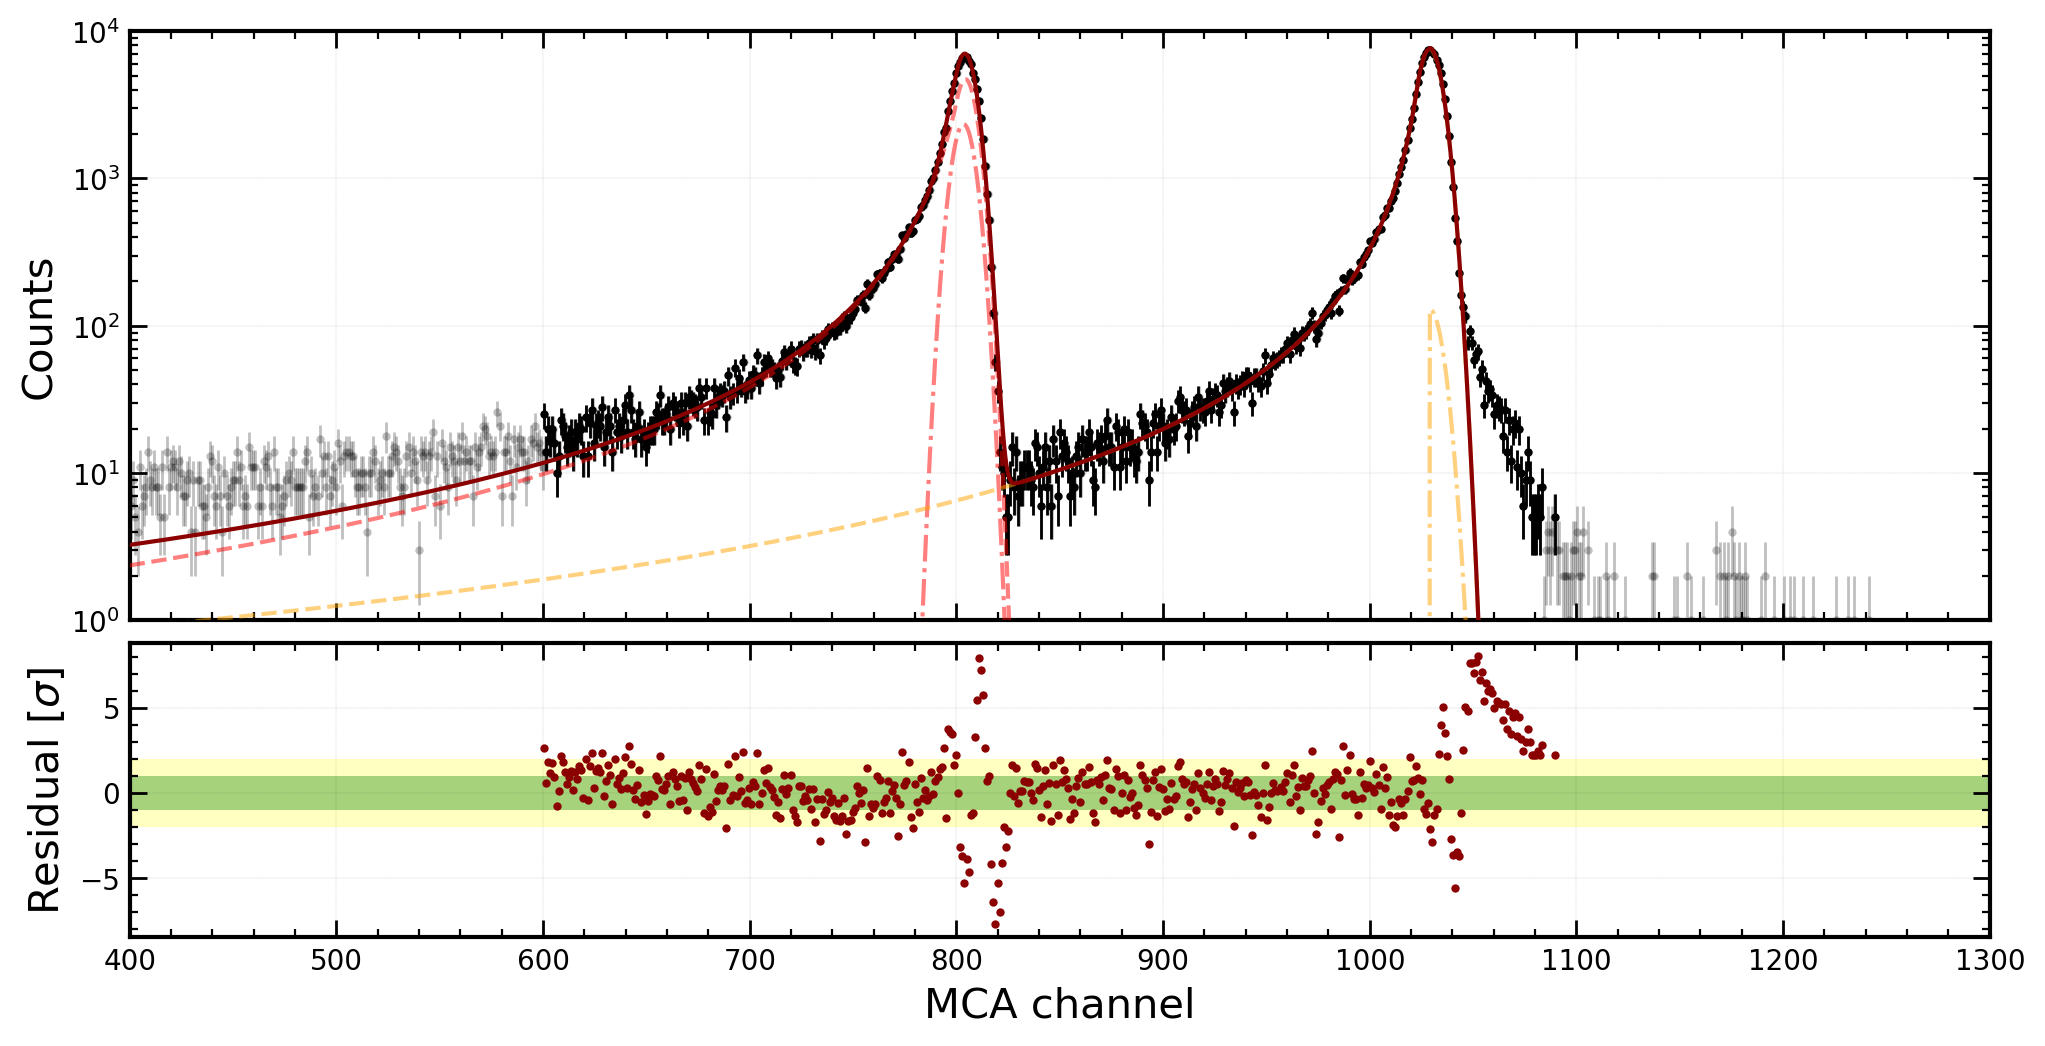

In [7]:
data, channels = blumchen.get_mca_histogram(MCA_range=[0, 1300])
_data, _channels = blumchen.get_mca_histogram(MCA_range=_MCA_range)
mask = (_data > _MCA_counts_limit)
_data = _data[mask]
_channels = _channels[mask]
_model = Model(_channels, *np.array(m.values))

x = np.arange(0, 1300, 0.1)
model = Model(x, *np.array(m.values))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), dpi=200, sharex=True, gridspec_kw={'height_ratios':[2,1], 'hspace': 0.05})

ax1.errorbar(channels, data, yerr=np.sqrt(data), lw=0, marker='o', color='black', ms=3, elinewidth=1, alpha=0.25)
ax1.errorbar(_channels, _data, yerr=np.sqrt(_data), lw=0, marker='o', color='black', ms=3, elinewidth=1, alpha=1)

l = ax1.plot(x, model.sum_terms(), ls='-', color='darkred', zorder=5)
ax1.plot(x, model.crystalball_1, ls='--', lw=1.5, color='red', alpha=0.5, zorder=3)
ax1.plot(x, model.skewnorm_1, ls='-.', lw=1.5, color='red', alpha=0.5, zorder=3)
ax1.plot(x, model.crystalball_2, ls='--', lw=1.5, color='orange', alpha=0.5, zorder=3)
ax1.plot(x, model.skewnorm_2, ls='-.', lw=1.5, color='orange', alpha=0.5, zorder=3)

ax2.plot(_channels, (_data - _model.sum_terms()) / np.sqrt(_data), lw=0, marker='.', color=l[0].get_color())

ax2.axhspan(-2, 2, color='yellow', lw=0, alpha=0.25)
ax2.axhspan(-1, 1, color='green', lw=0, alpha=0.35)

ax1.set_yscale('log')
ax1.set_ylim(1e0, 1e4)
ax1.set_xlim(400, 1300)

ax1.grid()

# ax2.set_ylim(-5, 50)
ax2.grid()

ax2.set_xlabel('MCA channel')
ax1.set_ylabel('Counts')
ax2.set_ylabel('Residual [$\sigma$]')
        
plt.tight_layout()
plt.show()

## Fit time evolution

In [8]:
class Model:
    def __init__(self, 
                x, 
                A, tau, t0
                ):
        self.x = x
        self.A = A
        self.tau = tau
        self.t0 = t0
        self.compute_terms()

    def compute_terms(self):
        # self.exp = self.A * (1 - np.exp(- (self.x - self.t0) / self.tau ) ) # For accumaltion mode
        self.exp = self.A * (np.exp(- (self.x - self.t0) / self.tau ) ) # For expansion mode

    def sum_terms(self):
        return self.exp

    @staticmethod
    def total_model(x, A, tau, t0):
        model_instance = Model(x, A, tau, t0)
        return model_instance.sum_terms()

In [9]:
init = {
    'A': 10, 'tau': 3.8 * 24 * 60 * 60 / np.log(2), 't0': 4 * 60 * 60,
}
fixed = {
    'tau': True,
    't0': True,
}

_n_timestamp = 150
m = blumchen.get_time_evolution_fitting_object(model=Model, init=init, fixed=fixed, n_timestamp=_n_timestamp)
m.migrad()
m.minos()
m.hesse()

Prefit with scipy for deriving inital values
| Parameters | Value       | Error       |
------------------------------------------
| A          |       0.351 |       0.035 |
| tau        |  473665.636 |    3458.667 |
| t0         |   14400.000 |   47466.130 |
------------------------------------------


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 133.5 (χ²/ndof = 0.9)      │              Nfcn = 18               │
│ EDM = 8.86e-19 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │ 351.1e-3  │  1.0e-3   │  -1.0e-3   │   1.0e-3   │         │         │       │
│ 1 │ tau  │   474e3   │    5e3    │            │            │         │         │  yes  │
│ 2 │ t0   │  14.40e3  │  0.14e3   │            │            │         │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │           A           │
├──────────┼───────────┬───────────┤
│  Error   │   -1e-3   │   1e-3    │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌─────┬────────────────────────────┐
│     │        A      tau       t0 │
├─────┼────────────────────────────┤
│   A │ 9.66e-07     0e-6     0e-6 │
│ tau │     0e-6        0        0 │
│  t0 │     0e-6        0        0 │
└─────┴────────────────────────────┘

/tmp/ipykernel_19189/1223176613.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


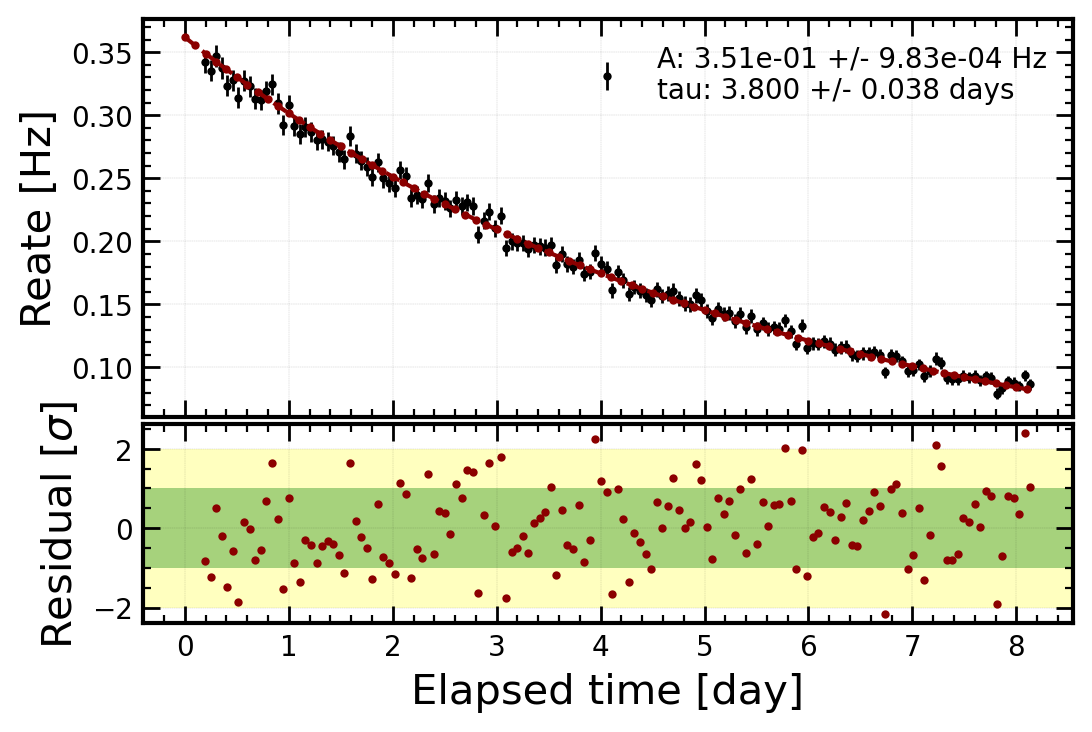

In [10]:
from_tau_to_halflife = 24 * 60 * 60 / np.log(2)
label = f'{m.parameters[0]}: {m.values[m.parameters[0]]:.2e} +/- {m.errors[m.parameters[0]]:.2e} Hz\n'
label += f'{m.parameters[1]}: {m.values[m.parameters[1]] / from_tau_to_halflife:.3f} +/- {m.errors[m.parameters[1]] / from_tau_to_halflife:.3f} days'

times, rate, rate_err = blumchen.get_time_evolution(n_timestamp=_n_timestamp)
_model = Model(times, *np.array(m.values))

x = np.arange(0, max(times / 60 / 60 / 24), 0.1)
model = Model(x * 60 * 60 * 24, *np.array(m.values))

fig, (ax1, ax2) = plt.subplots(2, 1, dpi=200, sharex=True, gridspec_kw={'height_ratios':[2,1], 'hspace': 0.025})

ax1.errorbar(times / 60 / 60 / 24, rate, yerr=rate_err, lw=0, marker='o', color='black', ms=3, elinewidth=1, label=label)

l = ax1.plot(x, model.sum_terms(), marker='o', ls='--', ms=3, color='darkred', zorder=5)

ax2.plot(times / 60 / 60 / 24, (rate - _model.sum_terms()) / rate_err, lw=0, marker='.', color=l[0].get_color())

ax2.axhspan(-2, 2, color='yellow', lw=0, alpha=0.25)
ax2.axhspan(-1, 1, color='green', lw=0, alpha=0.35)

ax1.grid()
ax2.grid()

ax2.set_xlabel('Elapsed time [day]')
ax1.set_ylabel('Reate [Hz]')
ax2.set_ylabel('Residual [$\sigma$]')

ax1.legend()

plt.tight_layout()
plt.show()

In [12]:
# Blumchen efficiency from
# https://www.mpi-hd.mpg.de/xenewmpiwiki/doku.php?id=hexe:coating:noia_master_thesis_second_update

eff = 31/100 # efficiency blumche
eff_err = 1/100 # rough estimate

A_true = m.values[m.parameters[0]]/eff
A_true_err = np.sqrt( (m.errors[m.parameters[0]]/m.values[m.parameters[0]])**2 + eff_err**2 )

print(f'Corrected activity: {A_true:.2f} +/- {A_true_err:.2f} Bq')

Corrected activity: 1.13 +/- 0.01 Bq


# Correction for emanation time

In [32]:
from datetime import datetime

date_start_ema = '18/06/2024 14:42'
date_stop_ema = '26/06/2024 11:50'

datetime_start_ema = datetime.strptime(date_start_ema, '%d/%m/%Y %H:%M')
datetime_stop_ema = datetime.strptime(date_stop_ema, '%d/%m/%Y %H:%M')

timestamp_start_ema = datetime_start_ema.timestamp()
timestamp_stop_ema = datetime_stop_ema.timestamp()

print(f"Timestamp for {date_start_ema}: {timestamp_start_ema} s")
print(f"Timestamp for {date_stop_ema}: {timestamp_stop_ema} s")

time_elapsed_ema = (timestamp_stop_ema - timestamp_start_ema)
print(f"Time elapsed: {time_elapsed_ema / (24 * 60 * 60):.2f} days")

Timestamp for 18/06/2024 14:42: 1718714520.0 s
Timestamp for 26/06/2024 11:50: 1719395400.0 s
Time elapsed: 7.88 days


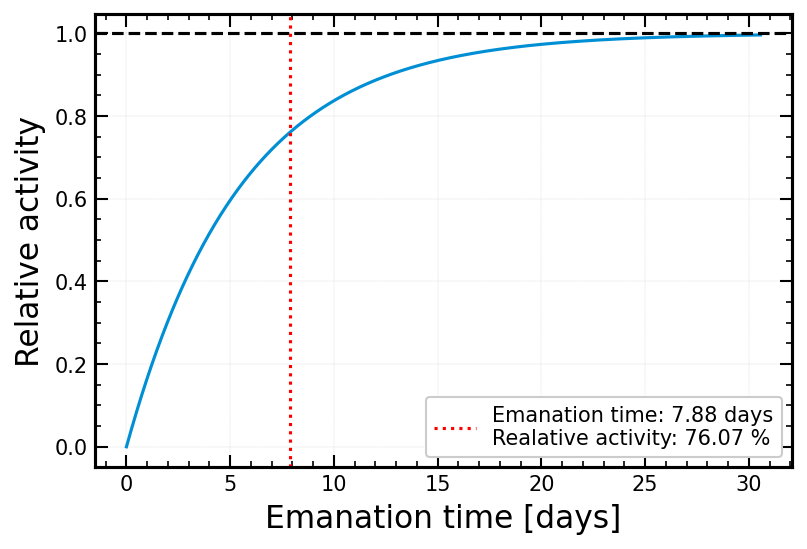

In [34]:
# N(t) = N0 * e^{-t/tau} = N0 * e^{-t * lambda}
# T_1/2 = ln(2) / lambda = tau * ln(2) 

T_half_222Rn = 3.82 # days
tau_222Rn = T_half_222Rn * 24 * 60 * 60 / np.log(2)

def accumulation(x, A=1, tau=tau_222Rn):
    return A * (1 - np.exp(- x / tau) )

xx = np.linspace(0, T_half_222Rn * 8 * 24 * 60 * 60, 1000)

relative_fraction = accumulation(time_elapsed_ema)
label = f'Emanation time: {time_elapsed_ema / (24 * 60 * 60):.2f} days\n'
label += f'Realative activity: {100 * relative_fraction:.2f} %'

plt.figure(dpi=150)

plt.plot(xx / (24 * 60 * 60), accumulation(xx))
plt.axhline(1, ls='--', color='black')
plt.axvline(time_elapsed_ema / (24 * 60 * 60), color='red', ls=':', label=label)

plt.xlabel('Emanation time [days]')
plt.ylabel('Relative activity')
plt.legend(loc='lower right', frameon=True)
plt.grid()
plt.show()

In [39]:
A_true_2 = A_true + A_true * (1 - relative_fraction)
A_true_2_err = A_true_err * (1 - relative_fraction)

print(f'Corrected activity considering the emanation time: {A_true_2:.3f} +/- {A_true_2_err:.3f} Bq')

Corrected activity considering the emanation time: 1.404 +/- 0.002 Bq
